Author: KuoChen Huang

## Questions

### (a)Download the Vertebral Column Data Set

In [1]:
import pandas as pd
from scipy.io import arff

In [2]:
# import the data and transform to dataframe
data = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [3]:
# there are only two class(Abnormal,Normal) in the dataframe
df['class'].unique()
# convert class name into 1(Abnormal) and 0(Normal) illustrated in the hw description
df.replace(b'Abnormal', 1, inplace=True)
df.replace(b'Normal', 0, inplace=True)

df.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


### (b)Pre-Processing and Exploratory data analysis

#### Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

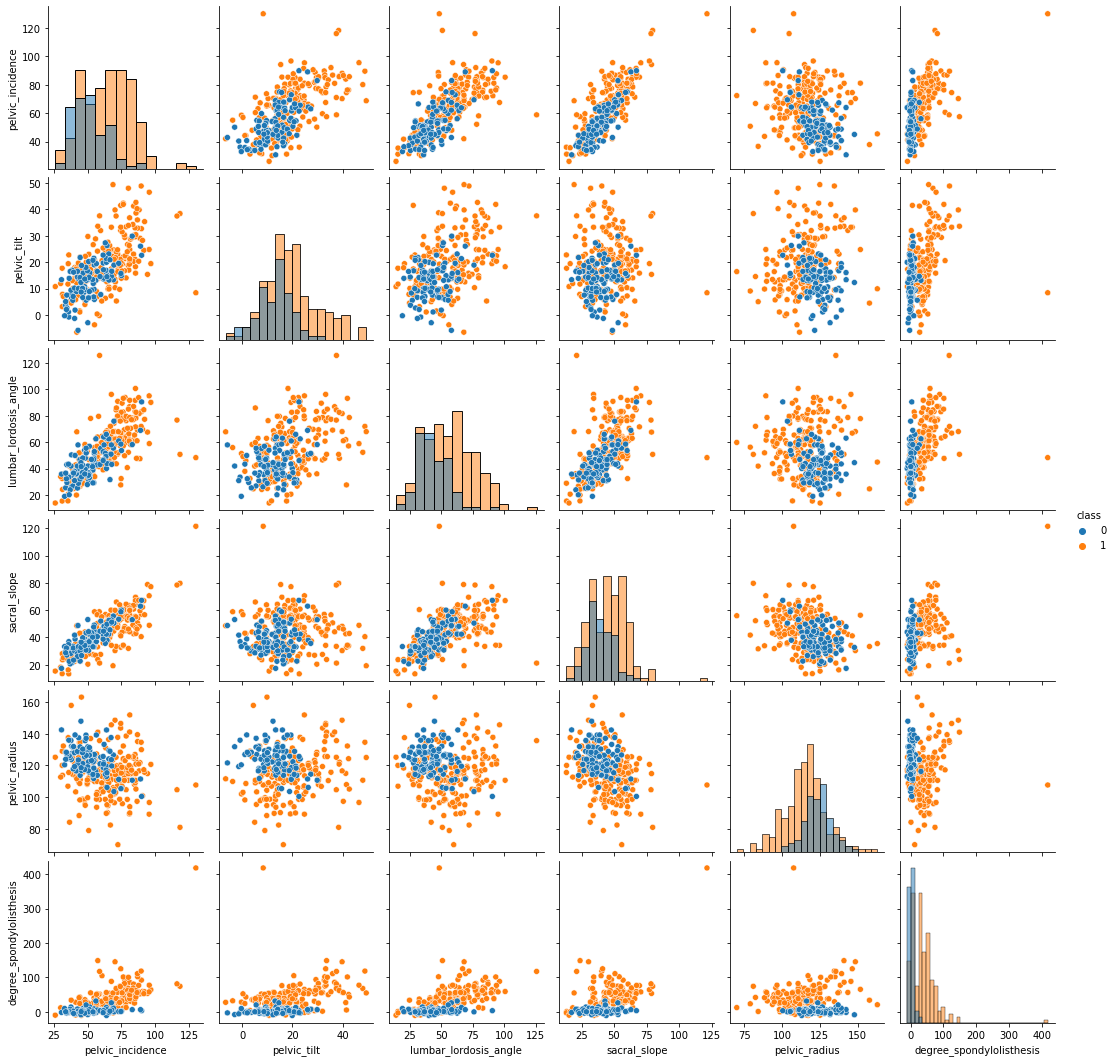

In [5]:
sns.pairplot(df, hue="class", diag_kind="hist")
plt.show()

#### Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

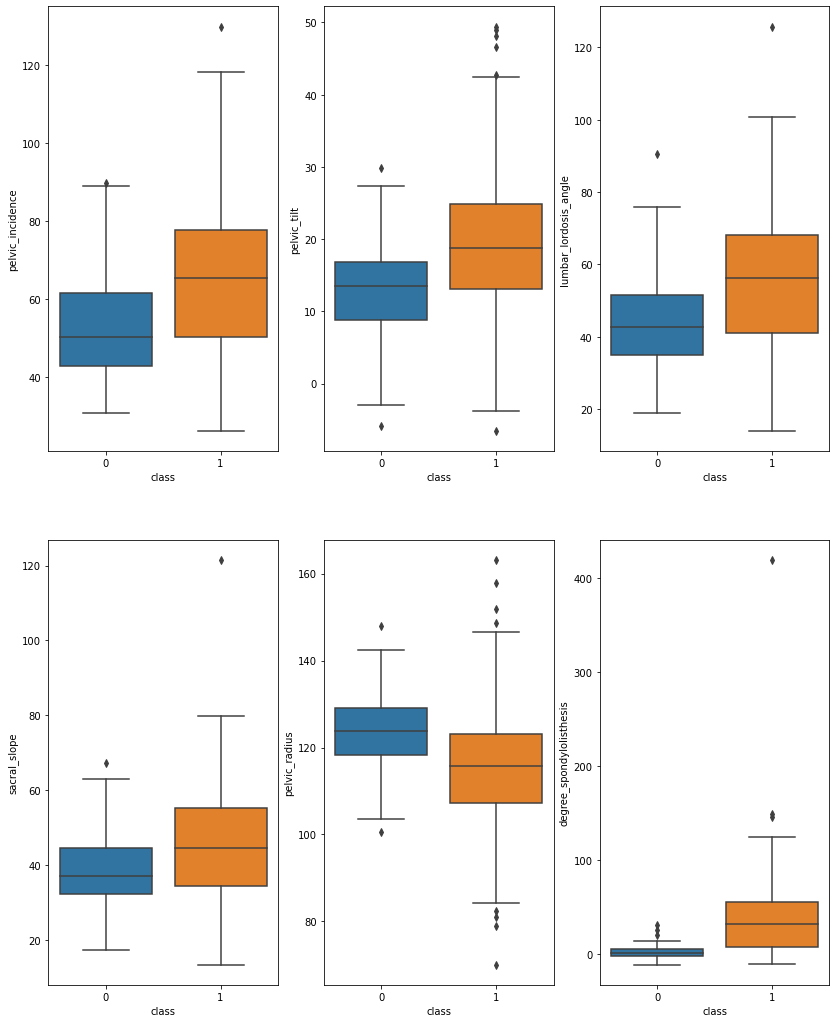

In [6]:
plt.figure(figsize=(14,18))

# i:from 1 to 6 / col:each column's name
for i, col in enumerate(df.columns[:6], start=1):
    plt.subplot(2,3,i)
    sns.boxplot(x = "class", y = col, data = df)

#### Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [7]:
training_data = pd.concat([df[df['class'] == 0].iloc[0:70,:], df[df['class'] == 1].iloc[0:140,:]], ignore_index=True)
testing_data = pd.concat([df[df['class'] == 0].iloc[70:,:], df[df['class'] == 1].iloc[140:,:]], ignore_index=True)

### (c) Classification using KNN on Vertebral Column Data Set

Description:
    (1) Create KNN Function with selected distance function
    (2) Classify based on 'k' neighbors
    (3) Test the result with the actual class

#### Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [8]:
import numpy as np
import math
import scipy.spatial

In [9]:
def Euclidean_Distance(point1, point2):
    p1 = np.array(point1)
    p2 = np.array(point2)
    distance = math.sqrt(sum((p1-p2)**2))
    return distance

#### Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Cal- culate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗

In this question, I would use scikit-learn knn library to do the training dataset; and use my own code to perform the testing dataset!

In [10]:
def most_frequent(List):
    return max(set(List), key = List.count)

In [11]:
import operator
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def KNN_by_myself(training_data, testing_data, k):
    # split dataset into dependent and independent variables
    training_x = training_data.iloc[:,:-1]
    testing_x = testing_data.iloc[:,:-1]
    training_y = training_data.iloc[:,-1]
    testing_y = testing_data.iloc[:,-1]
    
    
    vote = []
    # amounts of training and testing data
    train_count = training_data.shape[0]
    test_count = testing_data.shape[0]
    
    all_point_info = []
    nearest_points_class = {}
    # iterate every testing data
    for i in range(test_count):
        distance = {}
        # count the distance between the testing data and every training data
        for j in range(train_count):
            distance[j] = (Euclidean_Distance(testing_x.iloc[i], training_x.iloc[j]))
            #distance[j]= scipy.spatial.distance.euclidean(testing_x.iloc[i], training_x.iloc[j])
        
        # sort the distance in increasing and find the top k nearest points' indexes
        nearest_points = list(dict(sorted(distance.items(), key=operator.itemgetter(1))[:k]).keys())
        
        temp = list() # store the class
        for index in nearest_points:
            temp.append(training_y[index].item())
            nearest_points_class[i] = most_frequent(temp)
           
    '''
    # create dataframe
    knn_predict = pd.DataFrame.from_dict(nearest_points_class, orient = 'index', columns = ['KNN'])
    accurate_class = testing_y.to_frame(name = 'Actual')
    combine_df = pd.concat([knn_predict, accurate_class], join = 'outer', axis = 1)
    
    combine_df['Accurate'] = (combine_df['KNN'] == combine_df['Actual'])
    accuracy = (combine_df['Accurate'] == False).sum()/len(combine_df)
    '''
    
    accuracy = metrics.accuracy_score(testing_y, list(nearest_points_class.values()))
    
    #conf_matrix = confusion_matrix(list(nearest_points_class.values()), list(testing_y), labels=[0, 1])
    return 1-accuracy

In [12]:
from sklearn.neighbors import KNeighborsClassifier

def KNN_using_library(training_data, testing_data, k, p):
    training_x = training_data.iloc[:,:-1]
    testing_x = testing_data.iloc[:,:-1]
    training_y = training_data.iloc[:,-1]
    testing_y = testing_data.iloc[:,-1]
    
    KNN = KNeighborsClassifier(n_neighbors = k, p = p)
    KNN.fit(training_x, training_y)
    prediction = KNN.predict(testing_x)
    
    accuracy = metrics.accuracy_score(testing_y, prediction)
    return 1-accuracy

In [13]:
def KNN_using_library_training_performance(training_data, testing_data, k, p):
    training_x = training_data.iloc[:,:-1]
    testing_x = testing_data.iloc[:,:-1]
    training_y = training_data.iloc[:,-1]
    testing_y = testing_data.iloc[:,-1]
    
    KNN = KNeighborsClassifier(n_neighbors = k, p = p)
    KNN.fit(training_x, training_y)
    prediction = KNN.predict(training_x)
    
    accuracy = metrics.accuracy_score(training_y, prediction)
    return 1-accuracy

In [14]:
testing_error = {}
training_error = {}
for k in range(208, 0, -3):
    testing_error[k] = KNN_using_library(training_data, testing_data, k, 2)
    training_error[k] = KNN_using_library_training_performance(training_data, testing_data, k, 2)

In [15]:
print("When k = " + str(min(testing_error, key = testing_error.get)) + ", KNN has the lowest error rate!")

When k = 4, KNN has the lowest error rate!


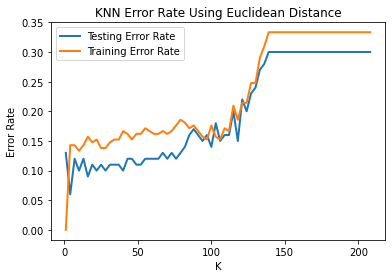

In [16]:
iterate_k = np.arange(208, 0, -3)
ax = plt.gca()
ax.set_title("KNN Error Rate Using Euclidean Distance")
ax.set_xlabel('K')
ax.set_ylabel('Error Rate')
ax.plot(iterate_k, testing_error.values(), label = 'Testing Error Rate', linewidth=2)
ax.plot(iterate_k, training_error.values(), label = 'Training Error Rate', linewidth=2)
plt.legend(loc='upper left')
plt.show()

In [17]:
training_x = training_data.iloc[:,:-1]
testing_x = testing_data.iloc[:,:-1]
training_y = training_data.iloc[:,-1]
testing_y = testing_data.iloc[:,-1]

nearest_points_class = {}

for i in range(testing_data.shape[0]):
    distance = {}
    for j in range(training_data.shape[0]):
            distance[j] = (Euclidean_Distance(testing_x.iloc[i], training_x.iloc[j]))
            
    nearest_points = list(dict(sorted(distance.items(), key=operator.itemgetter(1))[:4]).keys())
        
    temp = list() # store the class
    for index in nearest_points:
        temp.append(training_y[index].item())
        nearest_points_class[i] = most_frequent(temp)
        
conf_matrix = confusion_matrix(list(testing_y), list(nearest_points_class.values()) , labels=[0, 1])

print("Confusion Matrix: ")
print(conf_matrix)

TN, FP, FN, TP = conf_matrix.ravel()
print("TP, FP, FN, TN : ", TP, FP, FN, TN)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F_Score = 2*(Precision*Recall)/(Precision+Recall)

print('True Positive Rate:', TPR)
print('True Negative Rate:', TNR)
print('Precision:', Precision)
print('F-score:', F_Score)

Confusion Matrix: 
[[25  5]
 [ 1 69]]
TP, FP, FN, TN :  69 5 1 25
True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
F-score: 0.9583333333333333


#### Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

In [18]:
def split_dataset(training_data, N):
    class0_count = int(N/3)
    class1_count = N-class0_count
    
    new_training_ds = pd.concat([df[df['class'] == 0].iloc[0:class0_count,:], df[df['class'] == 1].iloc[0:class1_count:]], ignore_index=True)
    return new_training_ds

In [19]:
testing_error_over_each_n = {}

for n in range(10,211,10):
    error_with_k = {}
    trainging_subset = split_dataset(training_data, n)
    k = 1
    while k < n:
        error_with_k[k] = KNN_using_library(trainging_subset, testing_data, k, 2)
        k += 5
    testing_error_over_each_n[n] = min(error_with_k.values())

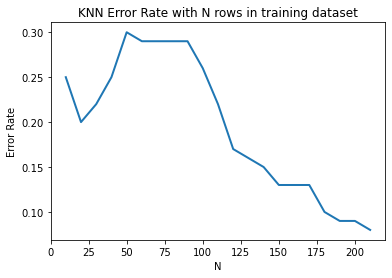

In [20]:
iterate_N = np.arange(10, 211, 10)
ax = plt.gca()
ax.set_title("KNN Error Rate with N rows in training dataset")
ax.set_xlabel('N')
ax.set_ylabel('Error Rate')
ax.plot(iterate_N, testing_error_over_each_n.values(), linewidth=2)
plt.show()

We can find that with more training data, the error rate will become lower.

### (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

#### i. Minkowski Distance:

##### A. which becomes Manhattan Distance with p = 1.

In [21]:
def KNN_using_library(training_data, testing_data, k, p):
    training_x = training_data.iloc[:,:-1]
    testing_x = testing_data.iloc[:,:-1]
    training_y = training_data.iloc[:,-1]
    testing_y = testing_data.iloc[:,-1]
    
    KNN = KNeighborsClassifier(n_neighbors = k, p = p)
    KNN.fit(training_x, training_y)
    prediction = KNN.predict(testing_x)
    
    accuracy = metrics.accuracy_score(testing_y, prediction)
    return 1-accuracy

In [22]:
testing_error_using_md = {}
for k in range(1, 197, 5):
    testing_error_using_md[k] = KNN_using_library(training_data, testing_data, k, 1)

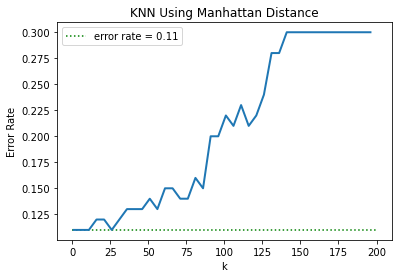

In [23]:
iterate_k_md = np.arange(1, 197, 5)

ax = plt.gca()
ax.set_title("KNN Using Manhattan Distance")
ax.set_xlabel('k')
ax.set_ylabel('Error Rate')
ax.plot(iterate_k_md, testing_error_using_md.values(), linewidth=2)
plt.hlines(min(testing_error_using_md.values()), 0, 200, colors='green', 
           label='error rate = ' + str(round(min(testing_error_using_md.values()),3)),linestyles='dotted')
plt.legend()
plt.show()

In [24]:
md_min_error = min(testing_error_using_md.values())
#print("When k = " + str(min(testing_error_using_md, key = testing_error_using_md.get)) + ", KNN using Manhattan Distance has the lowest error rate!" + "with error rate: " + str(testing_error_using_md[min(testing_error_using_md, key = testing_error_using_md.get)]))
for i in range(1, 197, 5):
    if testing_error_using_md[i] == md_min_error:
        print("When k = " + str(i) + ", knn using Manhattan Distance would have minimun error rate: " + str(round(md_min_error,3)))
        

When k = 1, knn using Manhattan Distance would have minimun error rate: 0.11
When k = 6, knn using Manhattan Distance would have minimun error rate: 0.11
When k = 11, knn using Manhattan Distance would have minimun error rate: 0.11
When k = 26, knn using Manhattan Distance would have minimun error rate: 0.11


##### B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

I decide to choose k = 26 in this question.

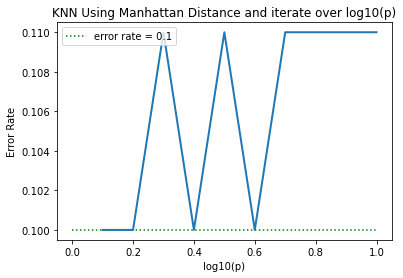

When log10(p) = [0.1, 0.2, 0.4, 0.6], 
We would get the minimum testing error with: 0.1


In [25]:
import math

P = [10 ** p for p in np.arange(0.1, 1.1, 0.1)]
testing_error_over_each_p = {}

for p in P:
    testing_error_over_each_p[p] = KNN_using_library(training_data, testing_data, 26, p)

ax = plt.gca()
ax.set_title("KNN Using Manhattan Distance and iterate over log10(p)")
ax.set_xlabel('log10(p)')
ax.set_ylabel('Error Rate')
ax.plot(np.arange(0.1, 1.1, 0.1), testing_error_over_each_p.values(), linewidth=2)
plt.hlines(min(testing_error_over_each_p.values()), 0, 1, colors='green', label='error rate = ' + str(round(min(testing_error_over_each_p.values()),3)),linestyles='dotted')
plt.legend(loc='upper left')
plt.show()

best_p = []
for p in P:
    if testing_error_over_each_p[p] == min(testing_error_over_each_p.values()):
        best_p.append(round(math.log10(p),2))

print("When log10(p) = " + str(best_p) + ", ")
print("We would get the minimum testing error with: " + str(round(min(testing_error_over_each_p.values()),3)))

##### C. which becomes Chebyshev Distance with p → ∞

In [26]:
testing_error_using_cd = {}
for k in range(1, 197, 5):
    testing_error_using_cd[k] = KNN_using_library(training_data, testing_data, k, float('inf'))

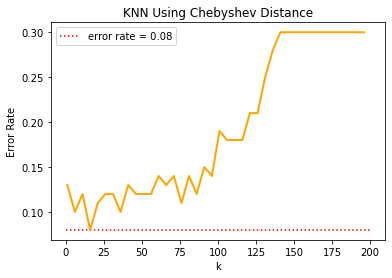

In [27]:
iterate_k_cd = np.arange(1, 197, 5)
ax = plt.gca()
ax.set_title("KNN Using Chebyshev Distance")
ax.set_xlabel('k')
ax.set_ylabel('Error Rate')
ax.plot(iterate_k_cd, testing_error_using_cd.values(), color='orange', linewidth=2)
plt.hlines(min(testing_error_using_cd.values()), 0, 200, colors='red', label='error rate = ' + str(round(min(testing_error_using_cd.values()),3)),linestyles='dotted')
plt.legend(loc='upper left')
plt.show()

In [28]:
cd_min_error = min(testing_error_using_cd.values())
#print("When k = " + str(min(testing_error_using_md, key = testing_error_using_md.get)) + ", KNN using Manhattan Distance has the lowest error rate!" + "with error rate: " + str(testing_error_using_md[min(testing_error_using_md, key = testing_error_using_md.get)]))
for i in range(1, 197, 5):
    if testing_error_using_cd[i] == cd_min_error:
        print("When k = " + str(i) + ", knn using Chebyshev Distance would have minimun error rate: " + str(round(cd_min_error,3)))
        

When k = 16, knn using Chebyshev Distance would have minimun error rate: 0.08


#### Mahalanobis Distance.

In [29]:
def KNN_using_Mahalanobis_Distance(training_data, testing_data, k):
    # split dataset into dependent and independent variables
    training_x = training_data.iloc[:,:-1]
    testing_x = testing_data.iloc[:,:-1]
    training_y = training_data.iloc[:,-1]
    testing_y = testing_data.iloc[:,-1]
    
    KNN = KNeighborsClassifier(n_neighbors = k, metric="mahalanobis",
                                   metric_params={'VI':pd.DataFrame(training_x.cov().values)})

    KNN.fit(training_x, training_y)
    prediction = KNN.predict(testing_x)
    
    accuracy = metrics.accuracy_score(testing_y, prediction)
    return 1-accuracy

In [30]:
testing_error_using_mahd = {}
for k in range(1, 197, 5):
    testing_error_using_mahd[k] = KNN_using_Mahalanobis_Distance(training_data, testing_data, k)

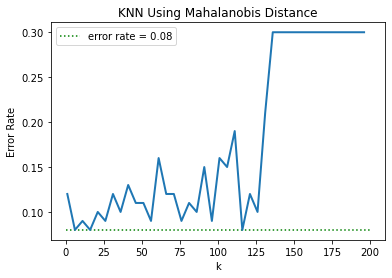

In [31]:
iterate_k_mahd = np.arange(1, 197, 5)
ax = plt.gca()
ax.set_title("KNN Using Mahalanobis Distance")
ax.set_xlabel('k')
ax.set_ylabel('Error Rate')
ax.plot(iterate_k_mahd, testing_error_using_mahd.values(), linewidth=2)
plt.hlines(min(testing_error_using_mahd.values()), 0, 200, colors='green', label='error rate = ' + str(round(min(testing_error_using_mahd.values()),3)),linestyles='dotted')
plt.legend(loc='upper left')
plt.show()

In [32]:
mahd_min_error = min(testing_error_using_mahd.values())

print("When k = " + str(min(testing_error_using_mahd, key = testing_error_using_mahd.get)) + ", KNN using Mahalanobis_Distance has the lowest error rate with error rate: " + str(round(testing_error_using_md[min(testing_error_using_md, key = testing_error_using_mahd.get)],3)))  
      

When k = 6, KNN using Mahalanobis_Distance has the lowest error rate with error rate: 0.11


### The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

In [33]:
def KNN_with_weight(training_data, testing_data, k, p):
    training_x = training_data.iloc[:,:-1]
    testing_x = testing_data.iloc[:,:-1]
    training_y = training_data.iloc[:,-1]
    testing_y = testing_data.iloc[:,-1]
    
    KNN = KNeighborsClassifier(n_neighbors = k, p = p, weights = 'distance')
    KNN.fit(training_x, training_y)
    prediction = KNN.predict(testing_x)
    
    accuracy = metrics.accuracy_score(testing_y, prediction)
    return 1-accuracy

In [34]:
te_with_weight_Euclidean = {}
te_with_weight_Manhattan = {}
te_with_weight_Chebyshev = {}

Euclidean_min_k = []
Manhattan_min_k = []
Chebyshev_min_k = []

for k in range(1, 197, 5):
    te_with_weight_Euclidean[k] = KNN_with_weight(training_data, testing_data, k, 2)
    te_with_weight_Manhattan[k] = KNN_with_weight(training_data, testing_data, k, 1)
    te_with_weight_Chebyshev[k] = KNN_with_weight(training_data, testing_data, k, float('inf'))

for k in range(1, 197, 5):
    if te_with_weight_Euclidean[k] == min(te_with_weight_Euclidean.values()):
        Euclidean_min_k.append(k)

    if te_with_weight_Manhattan[k] == min(te_with_weight_Manhattan.values()):
        Manhattan_min_k.append(k)
    
    if te_with_weight_Chebyshev[k] == min(te_with_weight_Chebyshev.values()):
        Chebyshev_min_k.append(k)

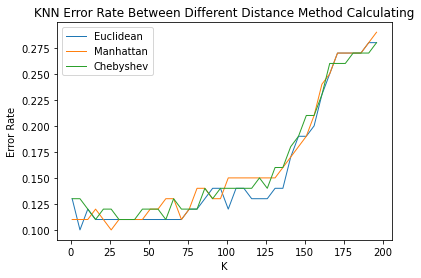

When using Euclidean Distance with weight, k = [6] would have minimum error rate: 0.1
When using Manhattan Distance with weight, k = [26] would have minimum error rate: 0.1
When using Chebyshev Distance with weight, k = [16, 31, 36, 41, 61] would have minimum error rate: 0.11


In [35]:
k_range = np.arange(1, 197, 5)
ax = plt.gca()
ax.set_title("KNN Error Rate Between Different Distance Method Calculating")
ax.set_xlabel('K')
ax.set_ylabel('Error Rate')
ax.plot(k_range, te_with_weight_Euclidean.values(), label = 'Euclidean', linewidth=1)
ax.plot(k_range, te_with_weight_Manhattan.values(), label = 'Manhattan', linewidth=1)
ax.plot(k_range, te_with_weight_Chebyshev.values(), label = 'Chebyshev', linewidth=1)

plt.legend(loc='upper left')
plt.show()



print("When using Euclidean Distance with weight, k = " + str(Euclidean_min_k) + " would have minimum error rate: " + str(round(te_with_weight_Euclidean[min(te_with_weight_Euclidean, key = te_with_weight_Euclidean.get)],3)))
print("When using Manhattan Distance with weight, k = " + str(Manhattan_min_k) + " would have minimum error rate: " + str(round(te_with_weight_Manhattan[min(te_with_weight_Manhattan, key = te_with_weight_Manhattan.get)],3)))
print("When using Chebyshev Distance with weight, k = " + str(Chebyshev_min_k) + " would have minimum error rate: " + str(round(te_with_weight_Chebyshev[min(te_with_weight_Chebyshev, key = te_with_weight_Chebyshev.get)],3)))




### What is the lowest training error rate you achieved in this homework?

The lowest training rate is 0(when k = 1)
Refer to the orange line in question 2.3.2